In [23]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None  # default='warn'
from datetime import datetime
now = datetime.now()
print(now)

2023-02-24 08:53:29.078187


### Product

In [24]:
dfProduct = pd.read_csv('../data_csv/Product.csv')
dfProduct

,name,product_id,is_outsourcing,product_code,quantity_product
0,Lưới màn 80G Black,1,0,1-LUOIMA-BLK-80-CM,2855.18
1,Lưới màn 80G White,2,0,1-LUOIMA-WHI-80-CM,7768.14
2,Lưới màn 80G Light White,3,0,1-LUOIMA-LWH-80-CM,4437.70
3,Lưới màn mỏng 28G Black,4,0,1-LUOIMA-BLK-28-CM,1887.90
4,Lưới màn mỏng 28G White,5,0,1-LUOIMA-WHI-28-CM,1644.20
...,...,...,...,...,...
11772,Viền 2.8cm Kate Khaki in logo SP (KHCC - CBA),12089,0,4-CAIN01-KHA-N0-28,0.00
11773,Viền 2.8cm Kate Dark Beige (KHCC - CBA),12090,0,4-KATECA-DBG-N0-28,0.00
11774,Viền 2.8cm Kate Dark Beige in logo SP (KHCC - ...,12091,0,4-CAIN01-DBG-N0-28,0.00
11775,Chỉ thêu Danh Tường D10124,12092,0,7-D10124-000-50-DT,0.00


### User 

In [25]:
dfUser = pd.read_csv('../data_csv/User.csv')
dfUser

,creator_id,fullname
0,1,Hệ thống
1,49,Trần Trọng Khiêm
2,53,hr5
3,130,ttd_marketing
4,132,Hệ thống
...,...,...
147,405,Đóng gói 1
148,406,Phòng may 4
149,407,Lean mẫu
150,408,Trí


#### Nguyên phụ liệu

In [26]:
dfProductUnit = pd.read_csv('../dataDA/ProductUnit.csv')
dfProductUnit

,product_id,product_unit_id,unit_id,name_unit,is_default
0,21,21,1,Mét,1
1,22,22,1,Mét,1
2,26,26,1,Mét,1
3,28,28,1,Mét,1
4,31,31,1,Mét,1
...,...,...,...,...,...
16842,7909,7919,20,Pia,1
16843,7914,7924,21,Cây,1
16844,7916,7926,21,Cây,1
16845,7917,7927,21,Cây,1


### PYC Xuat kho

In [27]:
dfReqStockoutProduct = pd.read_csv('../data_csv/ReqStockoutProduct.csv')
dfReqStockoutProduct = dfReqStockoutProduct.replace(np.NaN , '')
dfReqStockoutProduct

,creator_id,request_id,req_stockout_code,reason,req_stockout_status,is_complete_req,time_create
0,366,1,16062022-1,<p>PYC B&ugrave; h&agrave;ng s&ocirc; 35-2022 ...,completed,0,2022-06-16
1,366,2,16062022-2,<p>Ph&ograve;ng th&ecirc;u - 16/06 - Bex-22021...,completed,0,2022-06-16
2,366,3,16062022-3,<p>PYC-24/06-Lean 2 : DERMA SAFE HAT PO-37840</p>,completed,0,2022-06-16
3,366,4,16062022-4,<p>TỔ PHỐI - BAO ĐỰNG H&Agrave;NG</p>,completed,1,2022-09-24
4,366,5,16062022-5,<p>Phiếu b&ugrave; 21-06 : Lean 4- CHARTER BRE...,completed,1,2022-09-24
...,...,...,...,...,...,...,...
1908,368,2758,21022023-2758,B&ugrave; ĐH Flash Cap Lean 3,approval,0,2023-02-21
1909,352,2759,21022023-2759,TTD-230110-BIS VINCOM FUNDINO,review,0,2023-02-21
1910,368,2760,21022023-2760,Cấp NPL cho tổ cắt,completed,0,2023-02-21
1911,368,2761,21022023-2761,B&ugrave; ĐH lỗi vải DYC-CH1-221214-Hotel Pala...,approval,0,2023-02-21


In [28]:
dfReqStockoutProduct.loc[245]

creator_id                      366
request_id                      310
req_stockout_code      15072022-310
reason                             
req_stockout_status       completed
is_complete_req                   1
time_create              2022-08-30
Name: 245, dtype: object

In [29]:
from bs4 import BeautifulSoup
a = 0

for i in range(0 , dfReqStockoutProduct.shape[0]):
    aReq = dfReqStockoutProduct.loc[i]
    soup = BeautifulSoup(aReq['reason']).get_text()
    # print(soup)
    # dfReqStockoutProduct.iloc[[aReq.reason], [10]] = round((aMate['purchase_order_quantity']*aProductUnit['source_quantity']) , 4)
    dfReqStockoutProduct.at[aReq.name , 'reason'] = soup
dfReqStockoutProduct

c:\Users\Admin\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


,creator_id,request_id,req_stockout_code,reason,req_stockout_status,is_complete_req,time_create
0,366,1,16062022-1,PYC Bù hàng sô 35-2022 - Vương Thị Mỹ Trang : ...,completed,0,2022-06-16
1,366,2,16062022-2,Phòng thêu - 16/06 - Bex-220218-PO508-Lester B...,completed,0,2022-06-16
2,366,3,16062022-3,PYC-24/06-Lean 2 : DERMA SAFE HAT PO-37840,completed,0,2022-06-16
3,366,4,16062022-4,TỔ PHỐI - BAO ĐỰNG HÀNG,completed,1,2022-09-24
4,366,5,16062022-5,Phiếu bù 21-06 : Lean 4- CHARTER BREEZE HAT - ...,completed,1,2022-09-24
...,...,...,...,...,...,...,...
1908,368,2758,21022023-2758,Bù ĐH Flash Cap Lean 3,approval,0,2023-02-21
1909,352,2759,21022023-2759,TTD-230110-BIS VINCOM FUNDINO,review,0,2023-02-21
1910,368,2760,21022023-2760,Cấp NPL cho tổ cắt,completed,0,2023-02-21
1911,368,2761,21022023-2761,Bù ĐH lỗi vải DYC-CH1-221214-Hotel Palafitte,approval,0,2023-02-21


In [30]:
dfReqStockoutProduct = dfReqStockoutProduct.merge(dfUser, on = 'creator_id' , how = 'left')

In [31]:
dfReqStockoutProduct["reason"]= dfReqStockoutProduct["reason"].replace({'<p>':'' , '</p>' : '' , 
                                '&aacute;t' : 'át' , '&ugrave;' : 'ù' , '&atilde;' : 'ã' , '&ecirc;' : 'ê' , '&eacute;' : 'é' , 
                                '&nbsp;' : '' , '&agrave;' : 'à' , '\r\n' : ' ' , '&Agrave;' : 'À' , '&Eacute;' : 'É' , 
                                '&amp;' : '&' , '&uacute;' : 'ú' , '&oacute;' : 'ó' , '&Ocirc;' : 'Ô' , '<br />' : ' ' , '&igrave' : 'ì', '<div class="flex d-flex justify-content-center flex-column order_code_box product_code prod_code">' : '', 
                                '</div>' : '', '<div class="flex d-flex justify-content-center flex-column order_code_box product_code prod_name">' : '',
                                '<div class="text-dark-black  d-flex align-items-center justify-content-center ">' : '', 
                                '<div class="text-dark-black d-flex align-items-center justify-content-center">' : '', '&Atilde;' : 'Ã' , 
                                '<div class="d-flex customer_code justify-content-center ">' : '',
                                '<div class="d-flex customer_code justify-content-center ">' : '',
                                '<a href="https://marketing.tms-s.vn/don-hang/dinh-muc/1453"><span class="" title="UV Pro Wide Brim-Royal Navy-OS-PO 78">' : '',
                                '</span></a>' : '' ,
                                '<a href="https://marketing.tms-s.vn/don-hang/dinh-muc/1452"><span class="" title="UV Pro Wide Brim-Shell-OS-PO 78">' : '',
                                '<table class="NormalTable"> <tbody> <tr> <td width="200"><span class="fontstyle0">' : '',
                                '<table class="NormalTable">' : '',
                                '<tbody>' : '',
                                '<tr>' : '' , '</span>' : '' , '</td>' : '' , '</tr>' : '' , '</tbody>' : '' , '</table>' : '' ,
                                '<td width="200">' : '',
                                '<span class="fontstyle0">' : '',
                                '&aacute;' : 'á' , '&Aacute;': 'Á' , '&Acirc;' : 'Â' , '&ograve;' : 'ò' , '&acirc;' : 'â' , '&Ecirc;' : "Ê" , '&gt;' : '>' , "&Ugrave;" : 'Ù',
                                '&ocirc;' : 'ô' , "&Uacute;" : "Ú" , '&yacute;' : 'ý' , 
                                '<div id="bb_msg_id_1668654107801" class="chat-message wrap-message rotate-container me  -reaction" data-node-type="bubble-message">' : '' , 
                                '<div id="bb_msg_id_1668654107801" class="chat-message wrap-message rotate-container me  -reaction" data-node-type="bubble-message"> <div class=""> <div class="img-msg-v2 -caption -me -bg-v-1" data-id="div_SentMsg_Photo"> <div class="img-msg-v2__bub  --capt"> <div class="msg-select-overlay img-msg-v2__ft"> <div class="img-msg-v2__rct"> <div class="message-reaction-container  me  show-react-btn always-display img-has-title "> <div data-id="btn_SentMsg_React"> <div class="msg-reaction-icon"> <div class="default-react-icon-thumb">  <div class="emoji-list-wrapper  me  hide-elist"> <div class="reaction-emoji-list "> <div class="reaction-emoji-icon"> <div class="reaction-emoji-icon"> <div class="reaction-emoji-icon"> <div class="reaction-emoji-icon"> <div class="reaction-emoji-icon"> <div class="reaction-emoji-icon">           <div id="bb_msg_id_1668654175706" class="chat-message wrap-message rotate-container me  -reaction" data-node-type="bubble-message"> <div class=""> <div class="chat-message__actionholder  me "> <div class="card  me  card--text" data-id="div_SentMsg_Text">' : '' , 
                                '&iacute' : 'í' , '<strong>' : '' , '</strong>' : '' , '&Ograve;' : 'Ò' , '<span style="text-decoration: underline;">' : '' , '&Oacute;' : 'Ó' ,
                                '<a href="https://planning.tms-s.vn/don-hang-sa/846?only_view=1" target="_blank" rel="noopener">' : '' , '</a>' : '' , 
                                '<span id="page4R_mcid266" class="markedContent">' : '' , '<span dir="ltr" role="presentation">' : '' , '&rsquo;' : "'" , '<h4>' : '' , '</h4>' : '' ,
                                '<div class="flex-fill reason_box">' : '' , '<span class="text-dark-black text-center" title=" ">' : '' , '<div class="flex-fill material_name_box">' : '' ,
                                '<span class="text-dark-black text-center">' : '' , '&Iacute;' : 'Í' , }, regex=True)

dfReqStockoutProduct

,creator_id,request_id,req_stockout_code,reason,req_stockout_status,is_complete_req,time_create,fullname
0,366,1,16062022-1,PYC Bù hàng sô 35-2022 - Vương Thị Mỹ Trang : ...,completed,0,2022-06-16,Trần Đức Quý
1,366,2,16062022-2,Phòng thêu - 16/06 - Bex-220218-PO508-Lester B...,completed,0,2022-06-16,Trần Đức Quý
2,366,3,16062022-3,PYC-24/06-Lean 2 : DERMA SAFE HAT PO-37840,completed,0,2022-06-16,Trần Đức Quý
3,366,4,16062022-4,TỔ PHỐI - BAO ĐỰNG HÀNG,completed,1,2022-09-24,Trần Đức Quý
4,366,5,16062022-5,Phiếu bù 21-06 : Lean 4- CHARTER BREEZE HAT - ...,completed,1,2022-09-24,Trần Đức Quý
...,...,...,...,...,...,...,...,...
1908,368,2758,21022023-2758,Bù ĐH Flash Cap Lean 3,approval,0,2023-02-21,Trần Minh Thông
1909,352,2759,21022023-2759,TTD-230110-BIS VINCOM FUNDINO,review,0,2023-02-21,Ng.T.Thanh Trà
1910,368,2760,21022023-2760,Cấp NPL cho tổ cắt,completed,0,2023-02-21,Trần Minh Thông
1911,368,2761,21022023-2761,Bù ĐH lỗi vải DYC-CH1-221214-Hotel Palafitte,approval,0,2023-02-21,Trần Minh Thông


In [32]:
dfReqStockoutProduct = dfReqStockoutProduct.rename(columns= {"creator_id" : "creator_id_createrreq" , "fullname" : "fullname_req"})
dfReqStockoutProduct

,creator_id_createrreq,request_id,req_stockout_code,reason,req_stockout_status,is_complete_req,time_create,fullname_req
0,366,1,16062022-1,PYC Bù hàng sô 35-2022 - Vương Thị Mỹ Trang : ...,completed,0,2022-06-16,Trần Đức Quý
1,366,2,16062022-2,Phòng thêu - 16/06 - Bex-220218-PO508-Lester B...,completed,0,2022-06-16,Trần Đức Quý
2,366,3,16062022-3,PYC-24/06-Lean 2 : DERMA SAFE HAT PO-37840,completed,0,2022-06-16,Trần Đức Quý
3,366,4,16062022-4,TỔ PHỐI - BAO ĐỰNG HÀNG,completed,1,2022-09-24,Trần Đức Quý
4,366,5,16062022-5,Phiếu bù 21-06 : Lean 4- CHARTER BREEZE HAT - ...,completed,1,2022-09-24,Trần Đức Quý
...,...,...,...,...,...,...,...,...
1908,368,2758,21022023-2758,Bù ĐH Flash Cap Lean 3,approval,0,2023-02-21,Trần Minh Thông
1909,352,2759,21022023-2759,TTD-230110-BIS VINCOM FUNDINO,review,0,2023-02-21,Ng.T.Thanh Trà
1910,368,2760,21022023-2760,Cấp NPL cho tổ cắt,completed,0,2023-02-21,Trần Minh Thông
1911,368,2761,21022023-2761,Bù ĐH lỗi vải DYC-CH1-221214-Hotel Palafitte,approval,0,2023-02-21,Trần Minh Thông


In [33]:
dfReqStockoutProductStockOut = pd.read_csv('../data_csv/ReqStockoutProductStockOut.csv')
dfReqStockoutProductStockOut = dfReqStockoutProductStockOut.replace(np.NaN , 0)
dfReqStockoutProductStockOut

,product_id,creator_id,request_id,is_exported,is_complete_req_detail,quantity_req_stockout,assign_product_stockout_id,quantity_exported_req_stockout,time_stock_out
0,1,359.0,175,1,1,0.50,9163.0,0.50,2022-07-02
1,1,359.0,419,1,1,4.50,16579.0,4.50,2022-07-26
2,1,359.0,520,1,1,30.00,19089.0,30.00,2022-08-04
3,1,359.0,576,1,1,285.25,20661.0,285.25,2022-08-08
4,1,359.0,905,1,1,183.00,26358.0,183.00,2022-08-30
...,...,...,...,...,...,...,...,...,...
8513,12035,360.0,2739,1,1,5.00,65624.0,5.00,2023-02-21
8514,12036,360.0,2739,1,1,5.00,65625.0,5.00,2023-02-21
8515,12037,360.0,2739,1,1,5.00,65629.0,5.00,2023-02-21
8516,12038,0.0,2762,0,0,30500.00,0.0,0.00,0


In [34]:
dfReqStockoutProductStockOut = dfReqStockoutProductStockOut.groupby(['product_id', 'creator_id' ,'request_id', 'is_exported', 
                                    'is_complete_req_detail','quantity_req_stockout' , 'time_stock_out'], as_index=False)['quantity_exported_req_stockout'].sum()
dfReqStockoutProductStockOut

,product_id,creator_id,request_id,is_exported,is_complete_req_detail,quantity_req_stockout,time_stock_out,quantity_exported_req_stockout
0,1,359.0,175,1,1,0.50,2022-07-02,0.50
1,1,359.0,419,1,1,4.50,2022-07-26,4.50
2,1,359.0,520,1,1,30.00,2022-08-04,30.00
3,1,359.0,576,1,1,285.25,2022-08-08,285.25
4,1,359.0,905,1,1,183.00,2022-08-30,183.00
...,...,...,...,...,...,...,...,...
7781,12035,360.0,2739,1,1,5.00,2023-02-21,5.00
7782,12036,360.0,2739,1,1,5.00,2023-02-21,5.00
7783,12037,360.0,2739,1,1,5.00,2023-02-21,5.00
7784,12038,0.0,2762,0,0,30500.00,0,0.00


In [64]:
dfReqStockoutProductStockOut = dfReqStockoutProductStockOut.merge(dfProduct, on = 'product_id' , how = 'left')
dfReqStockoutProductStockOut = dfReqStockoutProductStockOut.merge(dfUser, on = 'creator_id' , how = 'left')
dfReqStockoutProductStockOut

,product_id,creator_id,request_id,is_exported,is_complete_req_detail,quantity_req_stockout,time_stock_out,quantity_exported_req_stockout,name_x,is_outsourcing_x,product_code_x,quantity_product_x,fullname_x,name_y,is_outsourcing_y,product_code_y,quantity_product_y,fullname_y
0,1,359.0,175,1,1,0.50,2022-07-02,0.50,Lưới màn 80G Black,0.0,1-LUOIMA-BLK-80-CM,2855.18,Nguyễn Hữu Đủ,Lưới màn 80G Black,0.0,1-LUOIMA-BLK-80-CM,2855.18,Nguyễn Hữu Đủ
1,1,359.0,419,1,1,4.50,2022-07-26,4.50,Lưới màn 80G Black,0.0,1-LUOIMA-BLK-80-CM,2855.18,Nguyễn Hữu Đủ,Lưới màn 80G Black,0.0,1-LUOIMA-BLK-80-CM,2855.18,Nguyễn Hữu Đủ
2,1,359.0,520,1,1,30.00,2022-08-04,30.00,Lưới màn 80G Black,0.0,1-LUOIMA-BLK-80-CM,2855.18,Nguyễn Hữu Đủ,Lưới màn 80G Black,0.0,1-LUOIMA-BLK-80-CM,2855.18,Nguyễn Hữu Đủ
3,1,359.0,576,1,1,285.25,2022-08-08,285.25,Lưới màn 80G Black,0.0,1-LUOIMA-BLK-80-CM,2855.18,Nguyễn Hữu Đủ,Lưới màn 80G Black,0.0,1-LUOIMA-BLK-80-CM,2855.18,Nguyễn Hữu Đủ
4,1,359.0,905,1,1,183.00,2022-08-30,183.00,Lưới màn 80G Black,0.0,1-LUOIMA-BLK-80-CM,2855.18,Nguyễn Hữu Đủ,Lưới màn 80G Black,0.0,1-LUOIMA-BLK-80-CM,2855.18,Nguyễn Hữu Đủ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,12035,360.0,2739,1,1,5.00,2023-02-21,5.00,Nhãn in satin W40mm x H50mm LE-SM (KHCC-CBA),0.0,8-CA0044-000-ST-CA,2795.00,Kho 3,Nhãn in satin W40mm x H50mm LE-SM (KHCC-CBA),0.0,8-CA0044-000-ST-CA,2795.00,Kho 3
7782,12036,360.0,2739,1,1,5.00,2023-02-21,5.00,Nhãn in satin W40mm x H95mm LE-ML (KHCC-CBA),0.0,8-CA0045-000-ST-CA,2195.00,Kho 3,Nhãn in satin W40mm x H95mm LE-ML (KHCC-CBA),0.0,8-CA0045-000-ST-CA,2195.00,Kho 3
7783,12037,360.0,2739,1,1,5.00,2023-02-21,5.00,Nhãn in satin W40mm x H50mm LE-ML (KHCC-CBA),0.0,8-CA0046-000-ST-CA,2195.00,Kho 3,Nhãn in satin W40mm x H50mm LE-ML (KHCC-CBA),0.0,8-CA0046-000-ST-CA,2195.00,Kho 3
7784,12038,0.0,2762,0,0,30500.00,0,0.00,Bao nylon trắng W26cm*H38cm in logo SP (KHCC-CBA),0.0,9-B02638-WHI-IN-CA,48000.00,NaN,Bao nylon trắng W26cm*H38cm in logo SP (KHCC-CBA),0.0,9-B02638-WHI-IN-CA,48000.00,NaN


In [65]:
dfReqStockoutProductStockOutSum = dfReqStockoutProductStockOut.merge(dfReqStockoutProduct, on = ['request_id'] , how = 'outer').replace(np.NaN , 0)

In [66]:
dfReqStockoutProductStockOutSum.head(2)

,product_id,creator_id,request_id,is_exported,is_complete_req_detail,quantity_req_stockout,time_stock_out,quantity_exported_req_stockout,name_x,is_outsourcing_x,product_code_x,quantity_product_x,fullname_x,name_y,is_outsourcing_y,product_code_y,quantity_product_y,fullname_y,creator_id_createrreq,req_stockout_code,reason,req_stockout_status,is_complete_req,time_create,fullname_req
0,1,359.0,175,1,1,0.5,2022-07-02,0.5,Lưới màn 80G Black,0.0,1-LUOIMA-BLK-80-CM,2855.180,Nguyễn Hữu Đủ,Lưới màn 80G Black,0.0,1-LUOIMA-BLK-80-CM,2855.180,Nguyễn Hữu Đủ,348.0,01072022-175,HM-220505-RAMMSTEIN : lỗi vải\nR2B-94-AC220355...,completed,0.0,2022-07-01,Nguyễn Thị Lạc
1,933,359.0,175,1,1,0.5,2022-07-02,0.5,Vải Microfiber nhung Blush Gray (14-4506 TCX),0.0,1-MICRO1-BGR-00-HV,64.339,Nguyễn Hữu Đủ,Vải Microfiber nhung Blush Gray (14-4506 TCX),0.0,1-MICRO1-BGR-00-HV,64.339,Nguyễn Hữu Đủ,348.0,01072022-175,HM-220505-RAMMSTEIN : lỗi vải\nR2B-94-AC220355...,completed,0.0,2022-07-01,Nguyễn Thị Lạc


In [237]:
dfReqStockoutTotal = dfReqStockoutProductStockOutSum.drop(columns= {'product_id' , 'request_id' , 'creator_id'})

new_col1 = ['req_stockout_code', 'product_code' , 'name' , 'quantity_product' ,'quantity_req_stockout' ,'quantity_exported_req_stockout', 'fullname_req', 'fullname' , 
      'reason', 'time_create', 'time_stock_out', 'is_exported' , 'is_complete_req_detail' , 'is_complete_req' , 'req_stockout_status']
   
dfReqStockoutTotal= dfReqStockoutTotal.reindex(columns=new_col1)
   
dfReqStockoutTotal.rename(columns = {'req_stockout_code':'Mã YC' , 'product_code': 'Mã NPL', 'name': 'Tên NPL' , 'quantity_product': 'Số lượng tồn kho',
                                             'quantity_req_stockout': 'SL yêu cầu XK', 'quantity_exported_req_stockout': 'SL đã xuất', 'fullname_req': 'Người tạo YC',
                                        'fullname': 'Người xuất kho' , 'reason': 'Lý do' , 'time_create': 'Ngày YC' , 'time_stock_out': 'Ngày xuất kho',
                                        'is_exported':'Đã xuất kho?' , 'is_complete_req_detail' : 'NPL trong PYC hoàn tất?' , 'is_complete_req' : 'PYC hoàn tất?' , "req_stockout_status" : 'Trạng thái PYC'}, inplace = True)
dfReqStockoutTotal

,Mã YC,Mã NPL,Tên NPL,Số lượng tồn kho,SL yêu cầu XK,SL đã xuất,Người tạo YC,Người xuất kho,Lý do,Ngày YC,Ngày xuất kho,Đã xuất kho?,NPL trong PYC hoàn tất?,PYC hoàn tất?,Trạng thái PYC
0,01072022-175,NaN,NaN,NaN,0.50,0.5,Nguyễn Thị Lạc,NaN,HM-220505-RAMMSTEIN : lỗi vải\nR2B-94-AC220355...,2022-07-01,2022-07-02,1,1,0.0,completed
1,01072022-175,NaN,NaN,NaN,0.50,0.5,Nguyễn Thị Lạc,NaN,HM-220505-RAMMSTEIN : lỗi vải\nR2B-94-AC220355...,2022-07-01,2022-07-02,1,1,0.0,completed
2,01072022-175,NaN,NaN,NaN,1.50,1.5,Nguyễn Thị Lạc,NaN,HM-220505-RAMMSTEIN : lỗi vải\nR2B-94-AC220355...,2022-07-01,2022-07-02,1,1,0.0,completed
3,01072022-175,NaN,NaN,NaN,0.50,0.5,Nguyễn Thị Lạc,NaN,HM-220505-RAMMSTEIN : lỗi vải\nR2B-94-AC220355...,2022-07-01,2022-07-02,1,1,0.0,completed
4,01072022-175,NaN,NaN,NaN,25.00,25.0,Nguyễn Thị Lạc,NaN,HM-220505-RAMMSTEIN : lỗi vải\nR2B-94-AC220355...,2022-07-01,2022-07-02,1,1,0.0,completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,13022023-2660,NaN,NaN,NaN,500.00,500.0,Ng.T.Thanh Trà,NaN,TTD-221112-MIZUNO RB JUNGLE BUCKET WHITE---TTD...,2023-02-13,2023-02-13,1,1,0.0,completed
7782,11022023-2645,NaN,NaN,NaN,1000.00,1000.0,Ng.T.Thanh Trà,NaN,TTD-221112-MIZUNO RB JUNGLE BUCKET WHITE------...,2023-02-11,2023-02-11,1,1,0.0,completed
7783,11022023-2636,NaN,NaN,NaN,1.74,0.0,Rad1,NaN,Xuất vải mẫu,2023-02-11,0,0,0,1.0,completed
7784,21022023-2753,NaN,NaN,NaN,20.00,20.0,Rad1,NaN,Xuat NPL mau,2023-02-21,2023-02-21,1,1,0.0,completed


In [238]:
dfReqStockoutTotal['Lý do'] = dfReqStockoutTotal['Lý do'].str.replace('+' , ' và ')
dfReqStockoutTotal['Lý do'] = dfReqStockoutTotal['Lý do'].str.replace('(' , '')
dfReqStockoutTotal['Lý do'] = dfReqStockoutTotal['Lý do'].str.replace(')' , '')

C:\Users\Admin\AppData\Local\Temp\ipykernel_3312\410947910.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfReqStockoutTotal['Lý do'] = dfReqStockoutTotal['Lý do'].str.replace('+' , ' và ')


In [239]:
# dfReqStockoutTotal['Lý do'] = dfReqStockoutTotal['Lý do'].str.lower()
# dfReqStockoutTotal

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer


In [241]:
dfReqStockoutTotal['Lý do'] = dfReqStockoutTotal['Lý do'].apply(str)


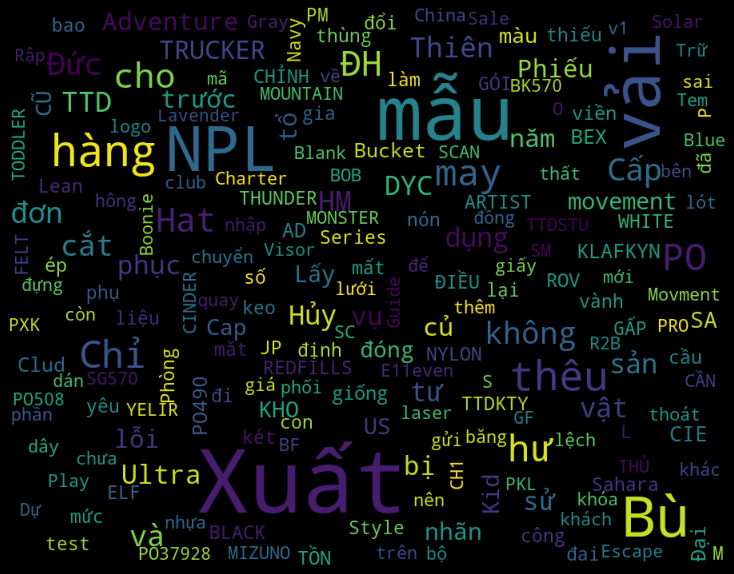

In [242]:
real_data = ' '.join(list(dfReqStockoutTotal['Lý do']))
real_data = WordCloud(width= 900, height= 700,
                          max_font_size = 110,
                          collocations = False).generate(real_data)


plt.figure(figsize=(10,10),facecolor='k')
plt.imshow(real_data)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [243]:
type = open("type.txt", "r")
action = open("action.txt", "r")
room = open("room.txt", "r")
reason = open("reason.txt", "r")
reason2 = open("reason2.txt", "r")

# reading the file
type = type.read()
action = action.read()
room = room.read()
reason = reason.read()
reason2 = reason2.read()

type = type.replace('\n', '|')
action = action.replace('\n', '|')
room = room.replace('\n', '|')
reason = reason.replace('\n', '|')
reason2 = reason2.replace('\n', '|')

action

'(Bù|Xuất bổ sung|may hư|Bù hàng|Xuất|Xuất hủy|Xuất điều chỉnh|Cấp|Xuất|XUẤT|Cấp bù|bù|- bù|-bù|-Bù|Bù|Bù thêm định mức| Bù|BÙ|Xuat|xuất|cấp| Xuất|May hư|may hư|keo lỗi|Đổi|Hủy|May|Thêm|làm mẫu|Ép keo|Lấy|bổ sung|Cắt|gửi|thêm|TEST MẪU)'

In [244]:
a = dfReqStockoutTotal['Lý do'].str.extract(type)
b = dfReqStockoutTotal['Lý do'].str.extract(action)
c = dfReqStockoutTotal['Lý do'].str.extract(room)
d = dfReqStockoutTotal['Lý do'].str.extract(reason)
e = dfReqStockoutTotal['Lý do'].str.extract(reason2)

dfReqStockoutTotal['Hành động'] = b 
dfReqStockoutTotal['Loại'] = a

dfReqStockoutTotal['Vì lý do'] = d 
dfReqStockoutTotal['+ lý do'] = e
dfReqStockoutTotal['Tổ'] = c

In [245]:
dfReqStockoutTotal

,Mã YC,Mã NPL,Tên NPL,Số lượng tồn kho,SL yêu cầu XK,SL đã xuất,Người tạo YC,Người xuất kho,Lý do,Ngày YC,Ngày xuất kho,Đã xuất kho?,NPL trong PYC hoàn tất?,PYC hoàn tất?,Trạng thái PYC,Hành động,Loại,Vì lý do,+ lý do,Tổ
0,01072022-175,NaN,NaN,NaN,0.50,0.5,Nguyễn Thị Lạc,NaN,HM-220505-RAMMSTEIN : lỗi vải\nR2B-94-AC220355...,2022-07-01,2022-07-02,1,1,0.0,completed,NaN,vải,lỗi vải,thêu hư,NaN
1,01072022-175,NaN,NaN,NaN,0.50,0.5,Nguyễn Thị Lạc,NaN,HM-220505-RAMMSTEIN : lỗi vải\nR2B-94-AC220355...,2022-07-01,2022-07-02,1,1,0.0,completed,NaN,vải,lỗi vải,thêu hư,NaN
2,01072022-175,NaN,NaN,NaN,1.50,1.5,Nguyễn Thị Lạc,NaN,HM-220505-RAMMSTEIN : lỗi vải\nR2B-94-AC220355...,2022-07-01,2022-07-02,1,1,0.0,completed,NaN,vải,lỗi vải,thêu hư,NaN
3,01072022-175,NaN,NaN,NaN,0.50,0.5,Nguyễn Thị Lạc,NaN,HM-220505-RAMMSTEIN : lỗi vải\nR2B-94-AC220355...,2022-07-01,2022-07-02,1,1,0.0,completed,NaN,vải,lỗi vải,thêu hư,NaN
4,01072022-175,NaN,NaN,NaN,25.00,25.0,Nguyễn Thị Lạc,NaN,HM-220505-RAMMSTEIN : lỗi vải\nR2B-94-AC220355...,2022-07-01,2022-07-02,1,1,0.0,completed,NaN,vải,lỗi vải,thêu hư,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,13022023-2660,NaN,NaN,NaN,500.00,500.0,Ng.T.Thanh Trà,NaN,TTD-221112-MIZUNO RB JUNGLE BUCKET WHITE---TTD...,2023-02-13,2023-02-13,1,1,0.0,completed,NaN,NaN,NaN,NaN,NaN
7782,11022023-2645,NaN,NaN,NaN,1000.00,1000.0,Ng.T.Thanh Trà,NaN,TTD-221112-MIZUNO RB JUNGLE BUCKET WHITE------...,2023-02-11,2023-02-11,1,1,0.0,completed,NaN,NaN,NaN,NaN,NaN
7783,11022023-2636,NaN,NaN,NaN,1.74,0.0,Rad1,NaN,Xuất vải mẫu,2023-02-11,0,0,0,1.0,completed,Xuất,vải mẫu,NaN,NaN,NaN
7784,21022023-2753,NaN,NaN,NaN,20.00,20.0,Rad1,NaN,Xuat NPL mau,2023-02-21,2023-02-21,1,1,0.0,completed,Xuat,NPL,NaN,NaN,NaN


In [246]:
dfReqStockoutTotal.to_excel('../dataDA/get_req_stockout.xlsx')

In [206]:
a = 'Bù hàng trucker PO:37825,37888,do bên gia công Thiên Đức bị hư+mất'
b = a.replace('+' , ' và ')
b

'Bù hàng trucker PO:37825,37888,do bên gia công Thiên Đức bị hư và mất'